# Civic Data Hacking

# Overview

Since 1999, over [20 tornadoes](http://www.tornadohistoryproject.com/tornado/Arkansas/Faulkner) have touched down in Faulkner County. According to the [Conway Prepared](http://cityofconway.org/pages/conway-prepared/) website:

    The City of Conway Outdoor Warning Siren system consists of 22 sirens strategically placed throughout the City. The sirens may be activated individually or simultaneously to provide a general alert for the entire community. 

With the continual expansion of Conway in recent years, we can ask the following research questions:

* How extensive is the coverage of this system?
* Are there locations in need of new sirens? 

We will explore these questions by calculating and visualizing the relationship between the locations of sirens and educational institutions in Conway using [publicly-available data](http://data-conwayargis.opendata.arcgis.com/). This kind of data analysis is know as [Civic Hacking](https://opengovdata.io/2014/civic-hacking/).


Before we can draw some figures, we will need a few more libraries. Hit Shift+Enter below to import the libraries to draw figures.

In [ ]:
%matplotlib inline

import math
import random
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from typing import *

This will load up the math and random libraries, and the matplotlib library, which we will use for all of our plotting functions. You are now ready to go with Jupyter Notebooks!

# Step 1  - Plotting Data

Here we will generate some random data to learn how the plotting functions work.
In the Matplotlib module, there is a function hist that will draw a histogram when given a list of numbers.

For our first plots, we will visualize the distribution of random numbers draw from our random module with `random.random()`. Recall that these numbers should be uniformly distributed between 0 and 1.

## Task 1.1

Write a small piece of code that will generate 1000 elements in a list called `nums`, where each element is a uniform random number from 0 to 1. Then, write `plt.hist(nums)` to draw the image in your notebook. 

The image should look vaguely like this:
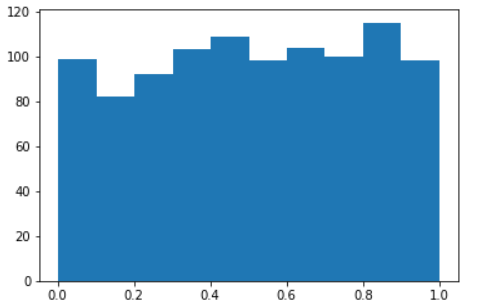

In [ ]:
# YOUR CODE HERE
plt.hist(nums)

## Task 1.2

Write a small piece of code that will generate 1000 elements in a list called `nums2`, where each element is the sum of two uniform random numbers from 0 to 1. Then, write `plt.hist(nums2)` to draw the image in your notebook. 

In [ ]:
# YOUR CODE HERE
plt.hist(nums2)

# Scatter Plots
When we have two-dimensional data, it is common to display this with a scatter plot. The scatter function will draw such a graph in Matplotlib.
## Task 1.3
Write a small piece of code that will generate 10000 elements in two lists called `xs` and `ys` where each element is the sum of three uniform random numbers from 0 to 1. Then, write `plt.scatter(xs, ys)` to draw the image in your notebook. 

In [ ]:
# YOUR CODE HERE
plt.scatter(xs, ys)

## Task 1.4

It is hard to see the pattern in the data because the many of the points overlap. We can change the size, color, and transparency of the points with additional parameters.

Change your earlier scatter plot call to `plt.scatter(xs, ys, s=100, c="r", alpha=0.02)`.

In [ ]:
plt.scatter(xs, ys, s=100, c="r", alpha=0.02)

# Labeling, Aspect Ratio
While we did make a scatter plot above, the image is more of a rectangle and not a square to match our actual coordinates. We can control the aspect ratio of the image and the size of the image by adding the following two lines before our call to plt.scatter.

    plt.figure(figsize=(6, 6), dpi=100)
    plt.axes().set_aspect(1)

These will set the size of the image to be at least 6 inches by 6 inches, and have a 1:1 aspect ratio between our x and y axes.

Second, it is always a good idea to title our figures and label our axes. We can add this flair with the following three lines.

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Sum of Three Random Numbers")

## Task 1.5
Copy your code from Task 1.4, and add the above code to your scatter plot.



In [ ]:
plt.figure(figsize=(6, 6), dpi=100)
plt.axes().set_aspect(1)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Sum of Three Random Numbers")
plt.scatter(xs, ys, s=100, c="r", alpha=0.02)

# Step 2 - Finding Distances
We will be analyzing GIS data for this lab, where points on the Earth are described using Latitude and Longitude. For example, the center of the city of Conway is at 35.0887° N Latitude, 92.4421° W Longitude, Little Rock is at 34.7465° N Latitude, 92.2896° W Longitude, and Tokyo is at 35.6895° N Latitude, 139.6917° E Longitude.

Because the Earth is a sphere, these coordinates use degrees as their units. Also, because of a spherical Earth, we cannot simply calculate a distance between the two points using the Euclidean distance formula. We will need to calculate the Great Circle Distance between the two points to know how far along the globe we will need to travel. This algorithm is as follows, using ϕ for latitude and λ for longitude.

* Convert the latitude and longitude into radians.
* Calculate the following formula: $arccos(sin(ϕ_1) \times sin(ϕ_2) + cos(ϕ_1) \times cos(ϕ_2) \times cos(|λ_1 - λ_2|))$
* Convert the result back into degrees.
* To find the distance in miles, multiply this by 69, since there are 69 standard miles in one degree of latitude. 

Also, latitudes that are south of the equator and longitudes that are west of the prime meridian are first converted to negative values.



## Task 2.1
Write a function `great_circle()` to calculate the great circle distance between two points when given coordinates on the globe. You will find the functions `abs()`, `math.degrees()`, `math.radians()`, `math.sin()`, `math.cos()`, and `math.acos()` particularly useful.

In [ ]:
def great_circle(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
    # YOUR CODE HERE


Use your function to calculate two distances: Conway to Little Rock, and Conway to Tokyo. 



In [ ]:
# Conway to Little Rock: Should be 25.138861294152708
great_circle(35.0887, -92.4421, 34.7465, -92.2896)

In [ ]:
# Conway to Tokyo: Should be 6497.1752798603075
great_circle(35.0887, -92.4421, 35.6895, 139.6917)

# Step 3 - Loading Data
We are ready to explore the data! There are two files in the data directory for you to load.

First, **Schools.csv** is a comma-separated file that contains information on the 23 educational institutions in Conway. In this file, we can find each school's latitude and longitude, the name, the type of school, and the street address.

Second, **Tornado_Sirens_2018.csv** is a comma-separated file that contains information on the 30 tornado sirens in Conway, some of which are inactive. In this file, we can find again the latitude and longitude of each siren, its approximate street address, elevation, and whether it is active.

**For both files, the first column of information is the Longitude, and the second column is the Latitude.**
## Task 3.1
We will load each file into a list of lists so we can have easy programatic access to our information. Write code to open the `Schools.csv` file. 

    school_file = open('/kaggle/input/conwaytornado/Schools.csv')

The first line of the file is the header information: you should ignore this line. For each subsequent line in the file, strip it of whitespace and split it on the comma character ','. Add this list to a larger list called `schools`. 

In [ ]:
# YOUR CODE HERE

If you are successful, you should have a list of 23 lists, and the following value for `schools[1]`

<pre>
['-92.454169059470274',
 '35.095976925127481',
 '8',
 '0',
 'Ida Burns Elementary',
 'Elementary',
 '1201 DONAGHEY AVENUE',
 '{CE5DFB8D-1936-47D5-98FE-E7A171FDBCDF}']</pre>

In [ ]:
schools[1]

In [ ]:
len(schools)

## Task 3.2
Also repeat the above code for the `Tornado_Sirens_2018.csv` file to create a list called `sirens`. **But, only add sirens that are marked as** 'Y' **in the** 'active' **column. All others should be added to a list called** `sirens_proposed`. If you are successful, you should have a `sirens` list of 23 lists, and the following value for `sirens[1]`

<pre>
['-92.407766509619833',
 '35.119060832235526',
 '9',
 '9',
 '5 Rolling Hills',
 '360',
 '"92° 24\' 27.959"" W"',
 '"35° 7\' 8.619"" N"',
 '9',
 'Y',
 '',
 '',
 'JLYON',
 '2015-11-12T22:27:06.000Z',
 '{7D1670AC-DB71-40D5-8065-BFEDD96669BA}']</pre>

In [ ]:
# YOUR CODE HERE

In [ ]:
sirens[1]

In [ ]:
len(sirens)

# Step 4 - Individual Schools
We can try to understand the effectiveness of the system of sirens by drawing a histogram of the distances between schools and the sirens. We would expect in a system with good coverage, we would see a somewhat uniform distribution with some sirens nearby.
## Task 4.1
Write a function called `siren_list(sc)` to return a list of distances between a given school index and each of the sirens. Your function will use the `great_circle()` function you wrote earlier, along with the `schools` and `sirens` lists. `sc` is an integer.

In [ ]:
def siren_list(sc: int) -> List[float]:
    # YOUR CODE HERE

## Task 4.2

Write a function called `find_school(name)` that returns the first array index that includes any part of the given school name in its school column.

In [ ]:
def find_school(name: str) -> int:
    # YOUR CODE HERE

## Task 4.3

Next, use `siren_list()` and `find_school()` to create a list of the distances found between Hendrix College and all of the sirens. From that list, draw a histogram of those distances. This graph should show the distribution of distances from sirens to Hendrix. Be sure to add a title and label your axes.

Note that the `plt.hist()` function has an optional `bins` parameter that controls the number of histogram bins. For example, `plt.hist(distances, bins=15)` will group the values in the list `distances` into 15 bins. You might find it helpful to vary the number of bins in order to best visualize your data.


In [ ]:
# YOUR CODE HERE

Q: How many sirens are within 1/2 mile? Within 1 mile? (Double-click on the "Replace This..." text and type your answer below)

*Replace This With Your Answer*

# Step 5 - School Coverage
Finally, we can gain some understanding of the total coverage of the system of sirens. Depending on the source of information, we can gather that tornado sirens can be heard out to between 0.5 and 1 mile from their source.
## Task 5.1
Use your `siren_list()` function to find the distance to the closest siren for each of the schools. Draw a histogram of these smallest distances found. Be sure to add a title and label your axes.

In [ ]:
# YOUR CODE HERE

It looks like we have an outlier! There is one school with a minimum distance of over a mile from a siren!

Q: Which school is closest to a siren? Which school is furthest away from a siren?

*Replace This With Your Answer*


## Task 5.2
Using a scatter plot, we can visualize in two dimensions the locations of the sirens in relation to the schools. If you make multiple plotting calls within the same block in a Jupyter notebook, then the figures will be drawn on top of each other.

Create lists of coordinates for the schools and sirens. Name the x coordinate list for the schools `scxs` and the list of school y coordinates `scys`. For the sirens, use `sixs` and `siys`. Make two calls to `plt.scatter()`, one to draw the schools in blue, and one to draw the sirens in red.



In [ ]:
# YOUR CODE HERE

## Task 5.3
This image can definitely be improved.

Because we are using latitude and longitude, the aspect ratio of the image needs to be altered. A degree in latitude is always the same distance (69 miles) but a degree in longitude will change, getting smaller as it approaches the north and south poles of the earth. Use a value of 1.63 to calibrate the aspect ratio correctly.

Let's also enlarge the circles for sirens to show the extent to which we can expect them to be heard. Make the siren radius equal 3750, and use an alpha value of 0.2 to make their color semi-transparent.

Be sure to add a sensible title to your figure, and label the axes.



In [ ]:
# YOUR CODE HERE

## Task 5.4
We can annotate the plot with some labels for important points of reference. For example, using the following line of code, we can see which blue dot represents Hendrix.

    plt.annotate("Hendrix College", (float(schools[10][0]), float(schools[10][1])))

Now, annotate the graph with Hendrix and the name of the school furthest away from any siren. Also, add green circles for each of the proposed sirens.

In [ ]:
# YOUR CODE HERE

Q: Based on this graph, at what GPS coordinates would you recommend adding a new tornado siren?

*Replace This With Your Answer*

Q: What other data would we need to consider and assumptions do we need to verity before making the conclusion that more tornado sirens are needed?

*Replace This With Your Answer*

# Step 6 - ShapeFile and HeatMap

Although beyond the scope of this class, we include here a more detailed way to visually represent the range of the siren network in Conway, and incoroporate the city boundaries in our image. Hit *Shift+Enter* on each of the following
boxes to execute them. 

*To make this code execute properly, you will need to use the variable names scxs, scys for the school x and y coordinate lists in Task 5.2, and sixs, siys for the siren x and y coordinate lists.*

In [ ]:
def siren_effect(xs, ys, siren_list, dist):
    z = np.zeros((len(ys), len(xs)))
    for i in range(len(xs)):
        x = xs[i]
        for j in range(len(ys)):
            y = ys[j]
            for s in siren_list:
                z[len(ys) - j - 1, i] += math.log(1 + max(0, dist - great_circle(y, x, float(s[1]), float(s[0]))))
    return z 

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('/kaggle/input/conwaytornado/Municipal_Boundaries.shp')
dx, dy = 0.001, 0.001
x = np.arange(-92.6, -92.36, dx)
y = np.arange(34.99, 35.16, dy)


In [ ]:
z = siren_effect(x, y, sirens, 1.25)
xmin, xmax, ymin, ymax = np.amin(x), np.amax(x), np.amin(y), np.amax(y)
extent = xmin, xmax, ymin, ymax
f, ax = plt.subplots(1, figsize=(6, 6), dpi=100)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Current Tornado Siren Coverage in Conway, AR")
ax.annotate("CLES", (float(schools[11][0]) + .002, float(schools[11][1]) + .002), color="w")
ax.annotate("CCSE", (float(schools[14][0]) + .002, float(schools[14][1]) + .002), color="w")
gpd.plotting.plot_polygon_collection(ax, gdf['geometry'], facecolor='none', linewidth=0.5, edgecolor='k')
plt.imshow(z, cmap=plt.cm.jet, alpha=.8, interpolation='bilinear', extent = extent)
plt.scatter(scxs, scys, c='w')
plt.scatter(sixs, siys, c='g')
plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))

# Step 7 - Reflection

Also include in this document a reflection on the civic engagement portion of this lab, at a minimum answering the following questions.

Q. Which graph above did you find the most useful in analyzing this data and why?

Q. Examine the other datasets available from the City of Conway. What are two other civic research questions you could imagine answering using the tools we learned in this lab?

Q. Describe a useful dataset that is not posted on the City of Conway website and how civic hacking could be used with it to address a community need. 

*Replace This With Your Answers*